## What is EDA?

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. 
It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

## Information About Dataset

The dataset crimes against woman in India is downloaded from kaggle for my project on Exploratory Data Analysis. This data is related to the crimes committed against woman in India in the year 2015-21, avilable through each year, for each district of each state. Rape, Kidnap and Abduction, and Dowry deaths etc... are some crimes listed in the dataset.

## Importing packages and dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

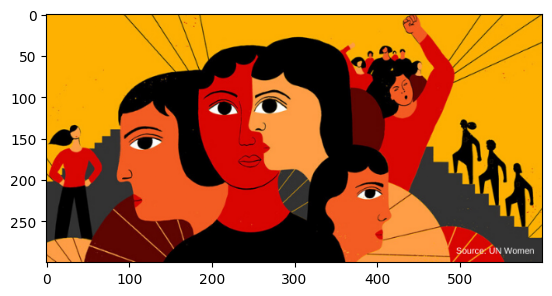

In [5]:
img=mpimg.imread('Source_UN-Women.png')
imgplot=plt.imshow(img)
plt.show()

In [11]:
crime_df=pd.read_csv("Crimes_against_women.csv")

In [12]:
crime_df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,Andhra Pradesh,2015,1027,684,174,4616,1070,6121,204
1,1,Arunachal Pradesh,2015,71,128,0,101,15,66,2
2,2,Assam,2015,1733,5039,216,4293,499,11225,47
3,3,Bihar,2015,1041,5158,1154,198,78,3792,21
4,4,Chhattisgarh,2015,1560,1354,89,1868,507,620,4
...,...,...,...,...,...,...,...,...,...,...
247,247,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
248,248,Daman & Diu,2021,315,904,16,1851,10,501,1
249,249,Delhi UT,2021,2,1,0,5,1,9,0
250,250,Lakshadweep,2021,0,0,0,1,1,3,0


In [13]:
crime_df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,Andhra Pradesh,2015,1027,684,174,4616,1070,6121,204
1,1,Arunachal Pradesh,2015,71,128,0,101,15,66,2
2,2,Assam,2015,1733,5039,216,4293,499,11225,47
3,3,Bihar,2015,1041,5158,1154,198,78,3792,21
4,4,Chhattisgarh,2015,1560,1354,89,1868,507,620,4


The head() function in Python, particularly with pandas, is used to display the first 5 rows of a DataFrame

In [14]:
crime_df.tail()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
247,247,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
248,248,Daman & Diu,2021,315,904,16,1851,10,501,1
249,249,Delhi UT,2021,2,1,0,5,1,9,0
250,250,Lakshadweep,2021,0,0,0,1,1,3,0
251,251,Puducherry,2021,2,0,2,31,3,12,0


The tail() function is used to display the last 5 rows of the DataFrame

## Data PreProcessing

Remove unwanted columns, deal with missing values, misspeled words, wrong datatypes etc...

In [15]:
crime_df.shape

(252, 10)

(rows,columns) of the DataFrame

In [16]:
crime_df.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

Here, 1 Unwanted column so we want to remove it by using drop() method

In [17]:
crime_df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [18]:
crime_df

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,Andhra Pradesh,2015,1027,684,174,4616,1070,6121,204
1,Arunachal Pradesh,2015,71,128,0,101,15,66,2
2,Assam,2015,1733,5039,216,4293,499,11225,47
3,Bihar,2015,1041,5158,1154,198,78,3792,21
4,Chhattisgarh,2015,1560,1354,89,1868,507,620,4
...,...,...,...,...,...,...,...,...,...
247,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
248,Daman & Diu,2021,315,904,16,1851,10,501,1
249,Delhi UT,2021,2,1,0,5,1,9,0
250,Lakshadweep,2021,0,0,0,1,1,3,0


In [19]:
crime_df.sample(10)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
241,Tripura,2021,2845,10574,2222,9393,27,18375,12
21,Rajasthan,2015,3644,4167,463,4813,649,14383,86
116,Himachal Pradesh,2018,344,341,4,513,78,183,10
30,Chandigarh,2015,72,165,5,76,22,126,0
47,Karnataka,2016,1655,1923,234,5260,703,2556,323
128,Punjab,2018,831,1266,67,956,19,1470,6
223,Haryana,2021,1716,2958,275,2882,290,5755,28
15,Manipur,2015,46,94,0,84,2,39,0
177,Delhi UT,2019,1253,3672,116,2355,456,3792,4
136,West Bengal,2018,1069,4249,444,3399,391,16951,97


Random sample of rows or columns from a DataFrame

In [20]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   252 non-null    object
 1   Year    252 non-null    int64 
 2   Rape    252 non-null    int64 
 3   K&A     252 non-null    int64 
 4   DD      252 non-null    int64 
 5   AoW     252 non-null    int64 
 6   AoM     252 non-null    int64 
 7   DV      252 non-null    int64 
 8   WT      252 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 17.8+ KB


It includes information about the dataFrame's structure

In [12]:
crime_df.isnull().sum()

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64

missing values of columns

In [13]:
crime_df.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2018.00000,917.734127,1878.289683,201.273810,2401.686508,347.698413,3193.194444,42.686508
std,2.00398,1226.548176,2785.368400,430.809218,3283.561937,896.909575,4761.681368,86.951336
min,2015.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.00000,59.750000,50.000000,1.000000,67.750000,6.750000,18.000000,0.000000
50%,2018.00000,489.500000,643.000000,30.500000,808.500000,35.000000,756.500000,6.000000
75%,2020.00000,1218.500000,2780.500000,220.250000,4182.500000,404.000000,4122.500000,40.000000
max,2021.00000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,20163.000000,491.000000


The **describe()** function in pandas provides a summary of statistics for numerical columns in a DataFrame. It includes measures like count, mean, standard deviation, minimum, maximum, and percentiles.

In [14]:
crime_df.describe(include='object')

,State
count,252
unique,36
top,Andhra Pradesh
freq,7


It shows the summary of all the columns in the DataFrame that have data type object

In [28]:
column_names = {
    'Rape': 'Rape Cases',
    'K&A': 'Kidnap and Assault',
    'DD': 'Dowry Deaths',
    'AoW': 'Assault on Women',
    'AoM': 'Assault on Minors',
    'DV': 'Domestic Violence',
    'WT': 'Witchcraft'
}
crime_df.rename(columns=column_names, inplace=True)

crime_df.columns

Index(['State', 'Year', 'Rape Cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')

Renaming the columns

In [16]:
crime_df.sample(10)

,State,Year,Rape Cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
89,Mizoram,2017,25,0,0,64,2,20,0
71,Puducherry,2016,6,11,0,43,13,15,0
113,Goa,2018,61,78,0,125,26,9,7
216,Andhra Pradesh,2021,1188,613,108,5108,2370,7092,70
179,Puducherry,2019,10,0,0,23,0,8,0
62,Uttar Pradesh,2016,4816,12994,2473,11335,9422,11156,50
244,West Bengal,2021,15,0,1,32,4,4,0
191,Karnataka,2020,637,151,6,3890,442,2707,5
99,Uttarakhand,2017,374,371,60,435,4,394,6
6,Gujarat,2015,503,1569,12,1164,536,4133,35


It will display 10 random rows from the DataFrame

In [22]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   252 non-null    object
 1   Year    252 non-null    int64 
 2   Rape    252 non-null    int64 
 3   K&A     252 non-null    int64 
 4   DD      252 non-null    int64 
 5   AoW     252 non-null    int64 
 6   AoM     252 non-null    int64 
 7   DV      252 non-null    int64 
 8   WT      252 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 17.8+ KB


Summary of a dataframe 

In [23]:
len(crime_df.State.unique())

36

There are 36 Unique values in the State Column

In [25]:
crime_df.State.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'A & N Islands', 'Chandigarh',
       'D&N Haveli', 'Daman & Diu', 'Delhi UT', 'Lakshadweep',
       'Puducherry'], dtype=object)

unique values of state column

In [26]:
crime_df.Year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

unique values of year column

# Exploratory Analysis and Visualization

## ScatterPlot

<Axes: xlabel='Year', ylabel='Rape Cases'>

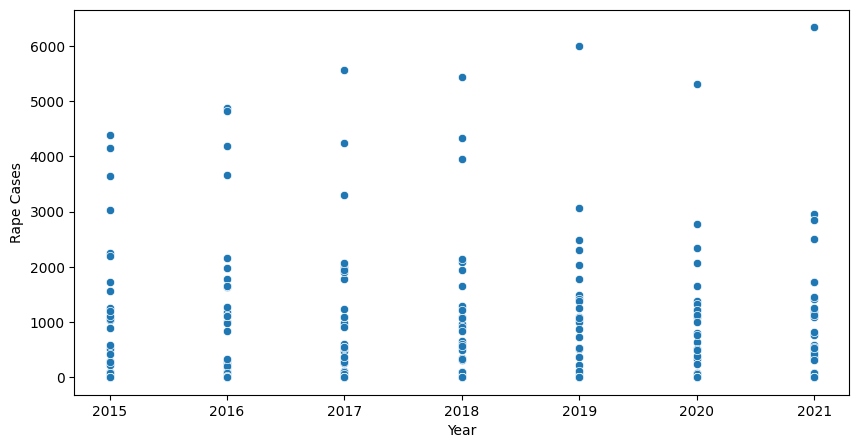

In [29]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Year',y='Rape Cases', data=crime_df)

The above plot shows the year and rape cases are related by plotting individual data points as coordinates on a 2D plane.
Each dot on the scatter plot represents an observation from the dataset,with its position dertermined by the values of the Year and rape cases

## Histogram

In [30]:
crime_df.describe()

,Year,Rape Cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
count,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2018.00000,917.734127,1878.289683,201.273810,2401.686508,347.698413,3193.194444,42.686508
std,2.00398,1226.548176,2785.368400,430.809218,3283.561937,896.909575,4761.681368,86.951336
min,2015.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.00000,59.750000,50.000000,1.000000,67.750000,6.750000,18.000000,0.000000
50%,2018.00000,489.500000,643.000000,30.500000,808.500000,35.000000,756.500000,6.000000
75%,2020.00000,1218.500000,2780.500000,220.250000,4182.500000,404.000000,4122.500000,40.000000
max,2021.00000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,20163.000000,491.000000


It is used to generate descriptive statistics of the numerical columns in a DataFrame.

In [31]:
Rape= crime_df.groupby(['State']).agg({
    'Rape Cases': 'sum'
}).sort_values(by = 'Rape Cases', ascending=True)[:15]
Rape

,Rape Cases
State,
Lakshadweep,10
Puducherry,36
Mizoram,206
A & N Islands,256
Manipur,371
Chandigarh,410
Goa,488
Arunachal Pradesh,495
Daman & Diu,589


It will display the sum of 'Rape Cases' for each 'State', sorted in ascending order, showing the top 15 states with the lowest total number of rape cases.

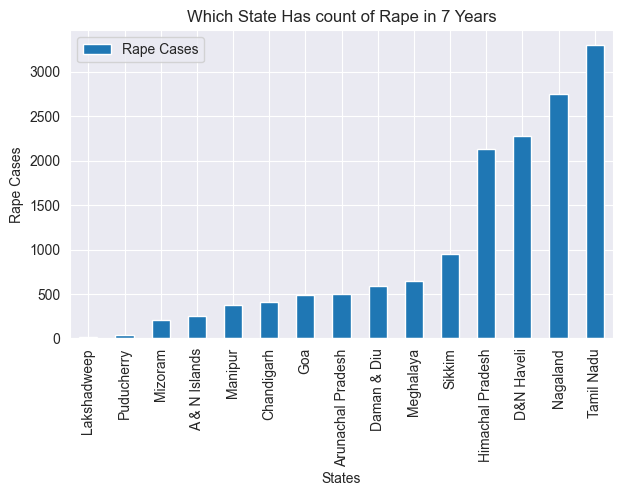

In [32]:
Rape.plot(kind='bar',figsize = (7,4))
plt.title('Which State Has count of Rape in 7 Years')
plt.xlabel('States')
plt.ylabel('Rape Cases')
plt.show()

In [33]:
DD= crime_df.groupby(['State']).agg({
    'Dowry Deaths': 'sum'
}).sort_values(by = 'State', ascending=False)[:15]
DD

,Dowry Deaths
State,
West Bengal,2421
Uttarakhand,1267
Uttar Pradesh,12323
Tripura,4632
Telangana,1161
Tamil Nadu,587
Sikkim,69
Rajasthan,2238
Punjab,1300


It will display the sum of 'Dowry Deaths' for each 'State', sorted by the 'State' names in descending order, showing the top 15 states.

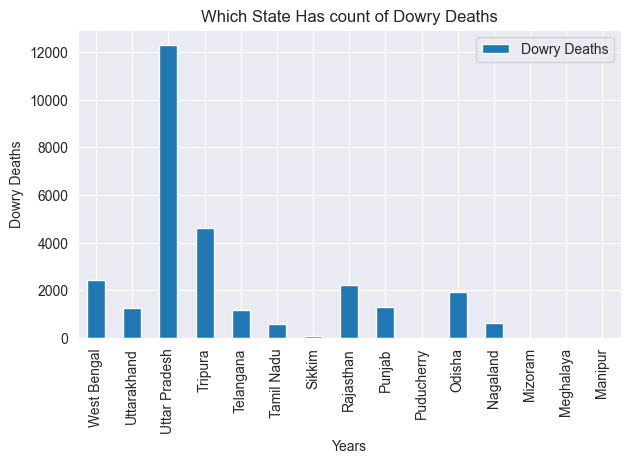

In [34]:
DD.plot(kind='bar',figsize = (7,4))
plt.title('Which State Has count of Dowry Deaths')
plt.xlabel('Years')
plt.ylabel('Dowry Deaths')
plt.show()

In [35]:
AoW= crime_df.groupby(['State']).agg({
    'Assault on Women': 'sum'
}).sort_values(by = 'State', ascending=False)[:15]
AoW

,Assault on Women
State,
West Bengal,19923
Uttarakhand,7093
Uttar Pradesh,57499
Tripura,20366
Telangana,20750
Tamil Nadu,13650
Sikkim,2089
Rajasthan,28621
Punjab,22721


It will display the sum of 'Assault on Women' for each 'State', sorted by the 'State' names in descending order, showing the top 15 states.

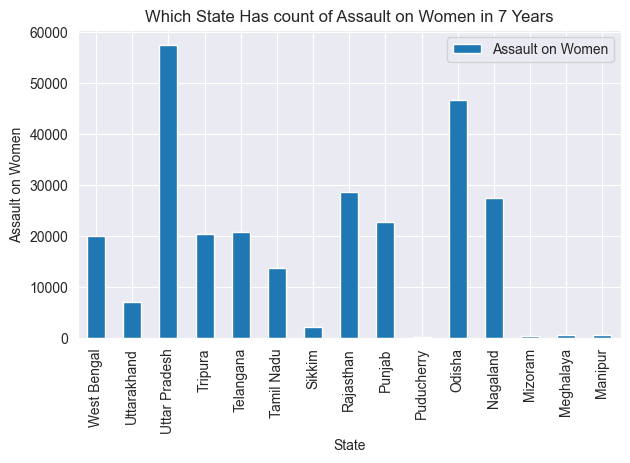

In [36]:
AoW.plot(kind='bar',figsize = (7,4))
plt.title('Which State Has count of Assault on Women in 7 Years')
plt.xlabel('State')
plt.ylabel('Assault on Women')

plt.show()

In [37]:
AoM= crime_df.groupby(['State']).agg({
    'Assault on Minors': 'sum'
}).sort_values(by = 'State', ascending=False)[:15]
AoM

,Assault on Minors
State,
West Bengal,2574
Uttarakhand,978
Uttar Pradesh,15553
Tripura,155
Telangana,4216
Tamil Nadu,1682
Sikkim,90
Rajasthan,1259
Punjab,959


It will display the sum of 'Assault of Minors' for each 'State', sorted by the 'State' names in descending order, showing the top 15 states.

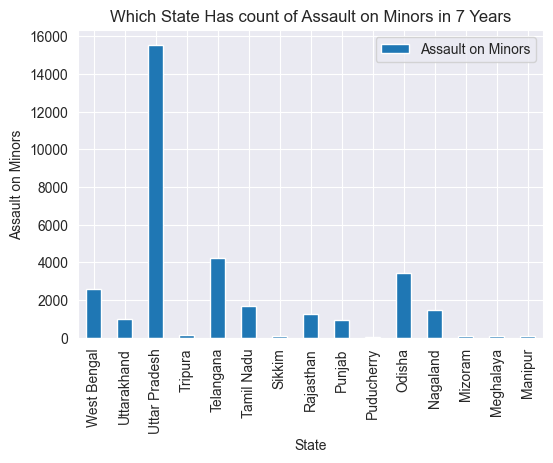

In [38]:
AoM.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Assault on Minors in 7 Years')
plt.xlabel('State')
plt.ylabel('Assault on Minors')

plt.show()

In [39]:
DV= crime_df.groupby(['State']).agg({
    'Domestic Violence': 'sum'
}).sort_values(by = 'State', ascending=False)[:15]
DV

,Domestic Violence
State,
West Bengal,90173
Uttarakhand,42373
Uttar Pradesh,66193
Tripura,34862
Telangana,37907
Tamil Nadu,22631
Sikkim,1575
Rajasthan,70388
Punjab,38129


It will display the sum of 'Domestic Violence' for each 'State', sorted by the 'State' names in descending order, showing the top 15 states.

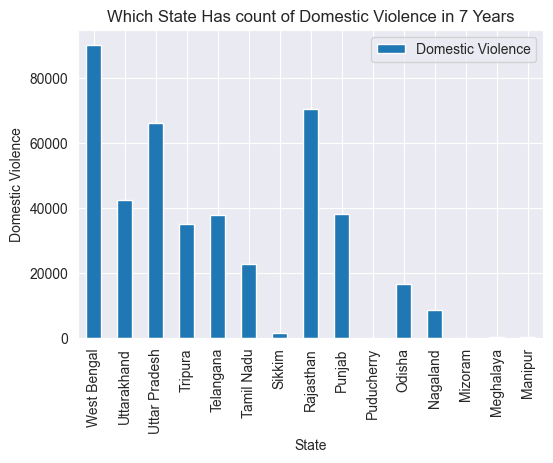

In [40]:
DV.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Domestic Violence in 7 Years')
plt.xlabel('State')
plt.ylabel('Domestic Violence')

plt.show()

In [41]:
WT= crime_df.groupby(['State']).agg({
    'Witchcraft': 'sum'
}).sort_values(by = 'State', ascending=False)[:15]
WT

,Witchcraft
State,
West Bengal,449
Uttarakhand,140
Uttar Pradesh,182
Tripura,41
Telangana,674
Tamil Nadu,2086
Sikkim,612
Rajasthan,330
Punjab,262


It will display the sum of 'Witchcraft' for each 'State', sorted by the 'State' names in descending order, showing the top 15 states.

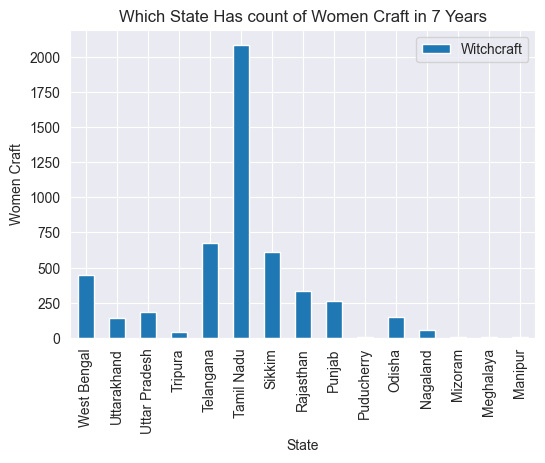

In [42]:
WT.plot(kind='bar',figsize = (6,4))
plt.title('Which State Has count of Women Craft in 7 Years')
plt.xlabel('State')
plt.ylabel('Women Craft')

plt.show()

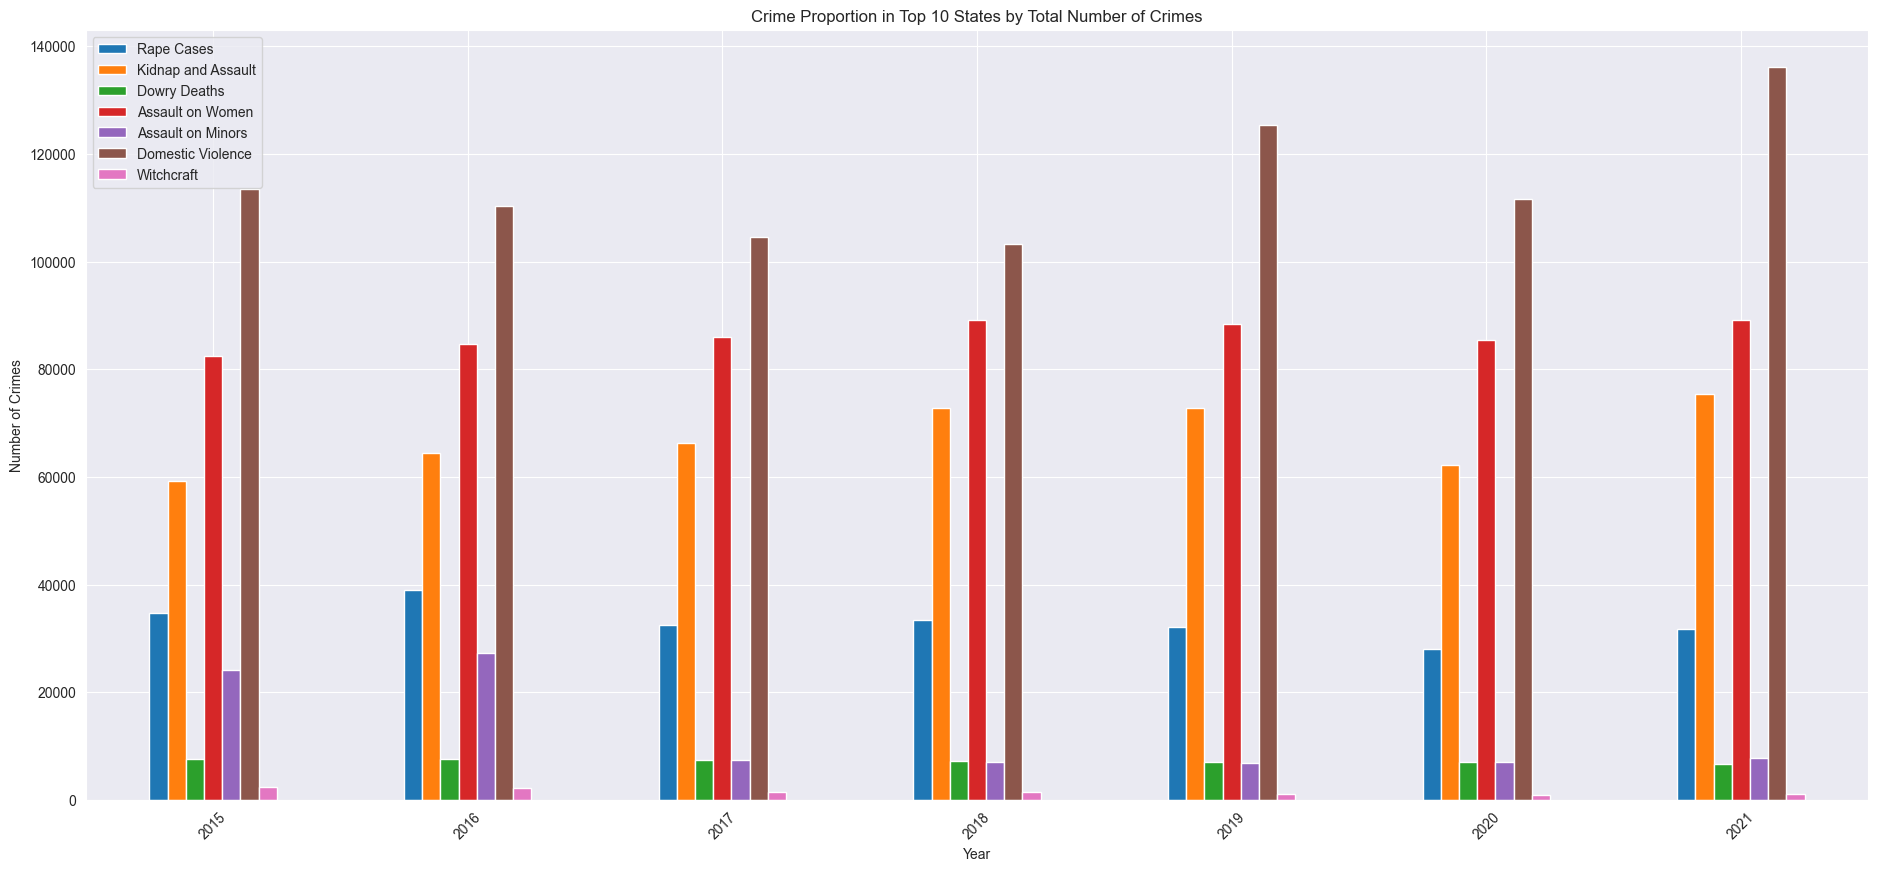

In [43]:
crime_df.groupby(['Year']).agg({
    'Rape Cases': 'sum',
    'Kidnap and Assault': 'sum',
    'Dowry Deaths': 'sum',
    'Assault on Women': 'sum',
    'Assault on Minors': 'sum',
    'Domestic Violence': 'sum',
    'Witchcraft': 'sum'
}).plot(kind = 'bar', figsize=(23, 10))
plt.title('Crime Proportion in Top 10 States by Total Number of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)

plt.show()

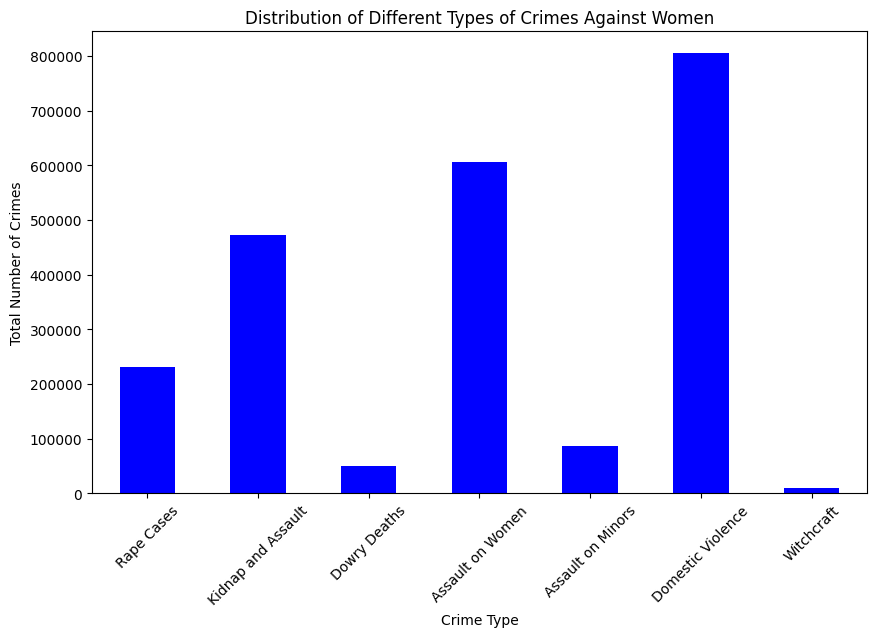

In [57]:
crime_distribution =crime_df.drop(['State', 'Year'], axis=1).sum()

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Different Types of Crimes Against Women')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x600 with 0 Axes>

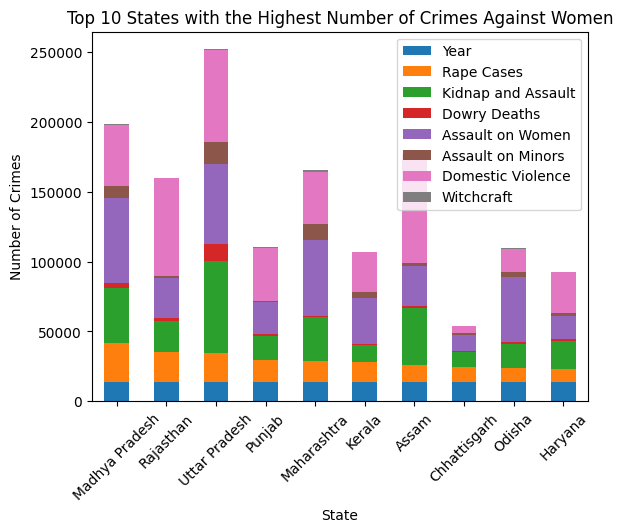

In [31]:
state_crime = crime_df.groupby('State').sum().sort_values(by='Rape Cases', ascending=False)

top_states = state_crime.head(10)

plt.figure(figsize=(14, 6))
top_states.plot(kind='bar', stacked=True)
plt.title('Top 10 States with the Highest Number of Crimes Against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

## Heat Map

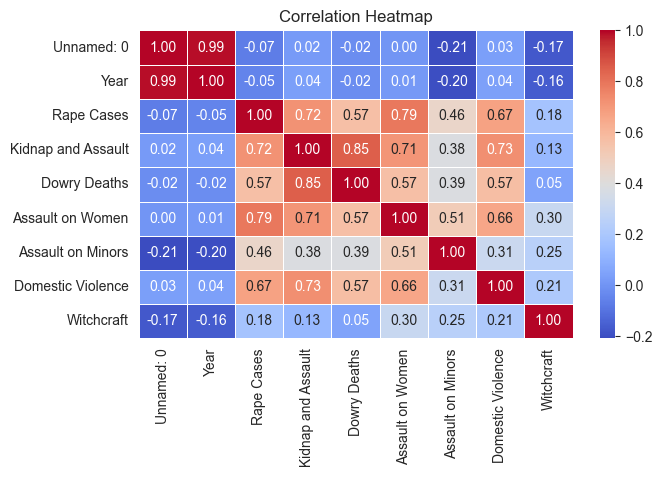

In [47]:
numeric_df = crime_df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(7,4))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

## Pairwise Plot

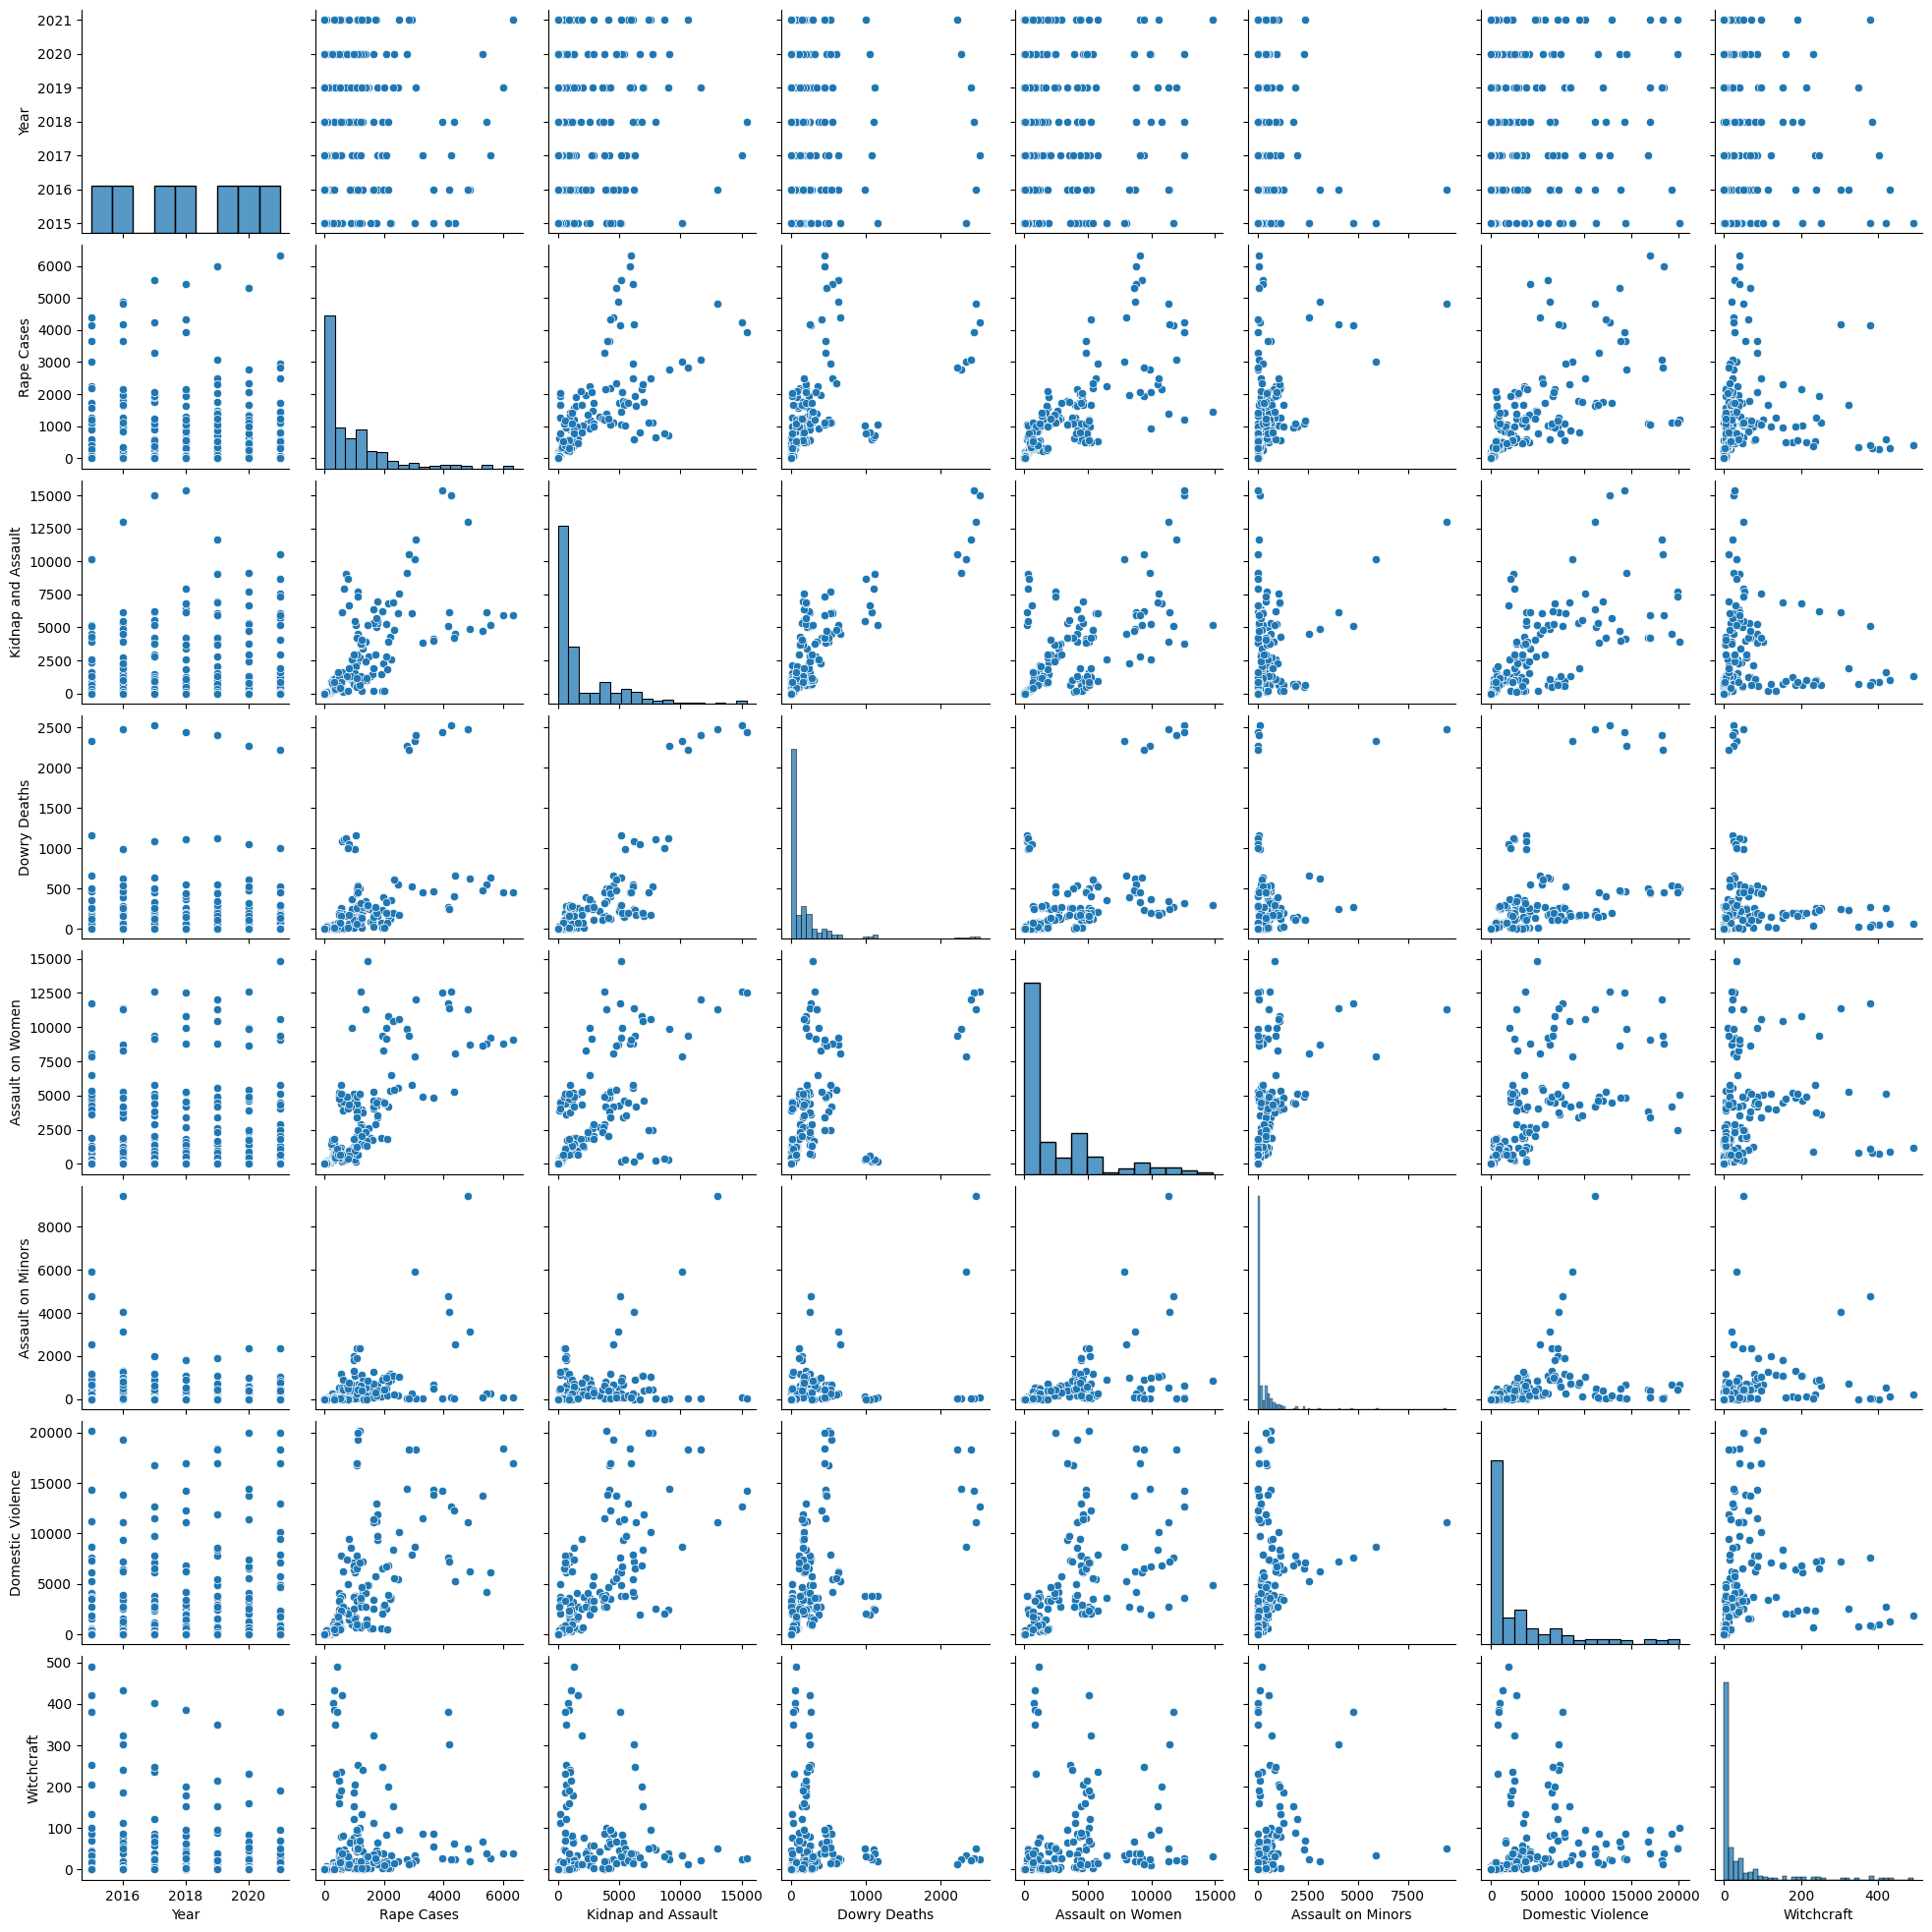

In [33]:
sns.pairplot(crime_df)

It will display a matrix of scatter plots for each pair of features in the dataframe,along with histograms,showing the relationships and distributions of the data

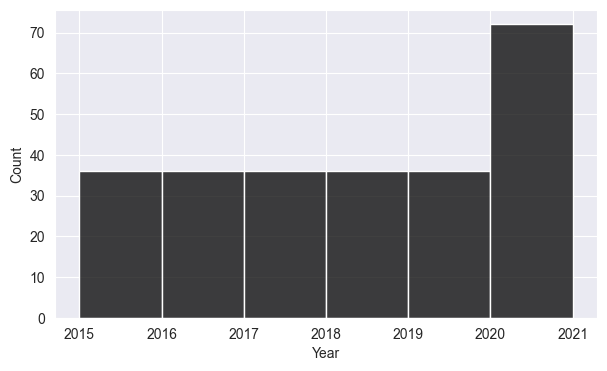

In [49]:
plt.figure(figsize=(7,4))
sns.histplot(x='Year', data=crime_df, color='black', binwidth=1)
sns.set_style("whitegrid")

It will display the crimes in each year

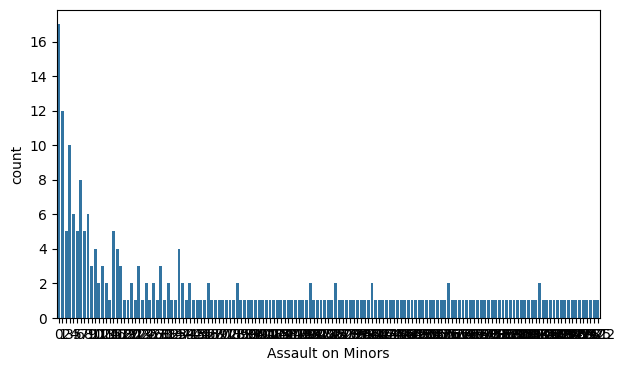

In [34]:
plt.figure(figsize=(7,4))

sns.countplot(x='Assault on Minors', data=crime_df)
plt.show()

It shows the counplot of Assault on Minors column 

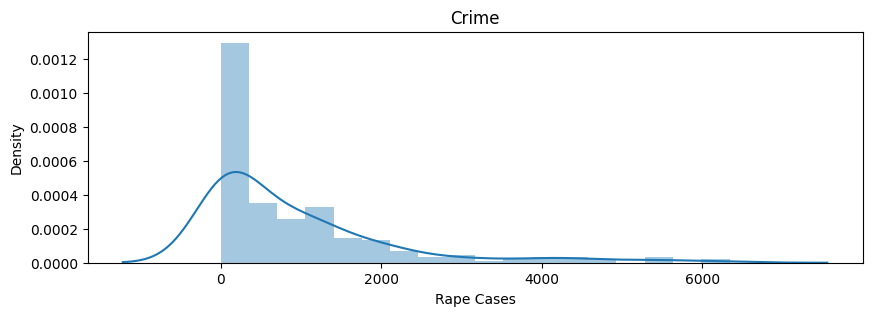

In [38]:
plt.figure(figsize=(10,3))
plt.title("Crime")
sns.distplot(crime_df['Rape Cases'])
plt.show()

The above plot shows the density of Rape Cases crime

In [44]:
crime_df['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

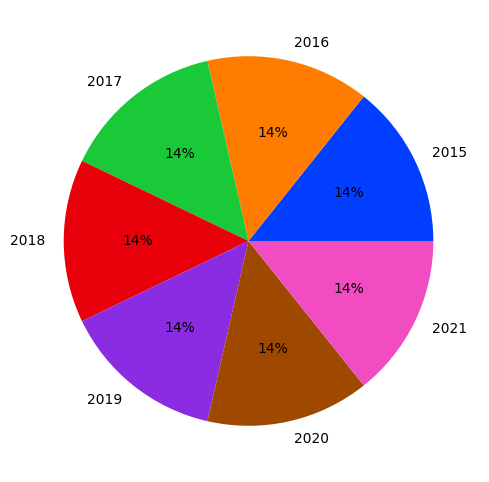

In [55]:
plt.figure(figsize=(6,6))
data = crime_df["Year"].value_counts()
 
keys = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct= '%.0f%%')
plt.show();

The above pie chart shows the how much percentage have each Years in dataframe

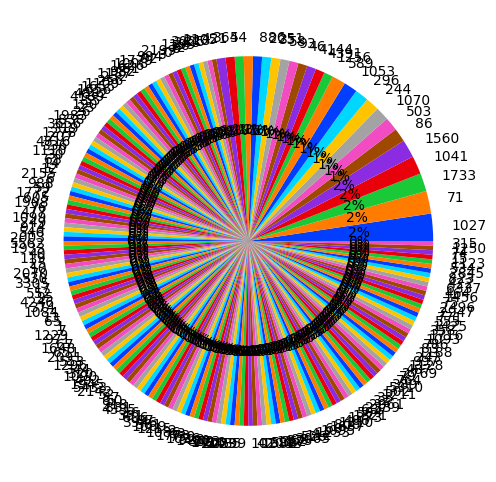

In [53]:
plt.figure(figsize=(6,6))
data = crime_df["Rape Cases"].value_counts()
 
keys = [1027,   71,  1733,  1041,  1560,   86,  503, 1070,   244,  296, 1053,
         589,  1256,  4391,  4144,  46,   93,  58,  35, 2251,  886, 3644,
          5,  421, 1105,  213, 3025,  283, 1199,   36,   72,    8, 2199,
          0,    3,  994,   92, 1779, 1008, 1626,   61,  982, 1187,  252,
        256, 1109, 1655, 1656, 4882, 4189,   55,  190,   23,   26, 1983,
        838, 3656,  319, 1278,  207, 4816,  336, 1110,   30,   68,   14,
         12, 2155,    6,  988,   59, 1772,  605, 1908,   76,  477, 1099,
        249,  914,  546, 2003, 5562, 1933,   40,  119,   25,   10, 2070,
        530, 3305,   17,  552,   95, 4246,  374, 1084,   13,   65,    1,
          7, 1229,  971,   67, 1648,  651, 2091,  553, 1296,  344,  320,
       1090,  492, 1945, 5433, 2142,   52,   87,   50,  918,  831, 4335,
         16,  331,  606,   97, 3946,  561, 1069, 1215,    2, 1086,   63,
       1773,  730, 1036,  528, 1480,  359,  223, 1416,  505, 2023, 2485,
       2299,  102,   42, 1382, 1002, 5997,   11,  362,  873,   88, 3065,
        526,  112,    4, 1253, 1095,   60, 1657,  806, 1210,  486, 1373,
       1321,  504,  637, 2339, 2061,   32,   33, 1211,  502, 5310,  389,
        764,   79, 2769,  487, 1128,  997,  243, 1188,   83,  786, 1093,
       1716,  358, 1425,  555,  771, 2947, 2496,   75, 1456,  464, 6337,
        422,  823, 2845,  534, 1123,   15,   74, 1250,  315]

palette_color = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=palette_color, autopct= '%.0f%%')
plt.show();

The above pie chart shows the how much percentage have Rape cases crime

## CONCLUSION

The exploratory data analysis (EDA) on the crimes_against_women dataset yielded valuable insights into the patterns and factors associated with crimes against women. Below are the key findings:

1. **Trends Over Time**: The analysis revealed fluctuations in the number of crimes against women over the years. Certain periods may show a significant rise or fall in reported cases, indicating either changes in reporting practices, law enforcement efficiency, or societal factors influencing crime rates.

2. **Geographical Patterns**: Some regions or states have higher rates of crimes against women, which could be linked to factors like population density, cultural practices, or socio-economic conditions. These high-risk regions may need focused interventions and policy measures to reduce crime rates.

3. **Types of Crimes**: Different types of crimes against women (e.g., domestic violence, harassment, assault) show varied distribution patterns across regions and over time. Understanding the prevalence of each crime type helps in addressing them through targeted awareness and preventive measures.

4. **Impact of Law Enforcement**: Changes in law enforcement policies or the introduction of women's safety initiatives may reflect in the dataset as a reduction in certain crime types. However, continuous monitoring and strict law enforcement are necessary to sustain these improvements.

5. **Correlations**: The analysis identified possible correlations between socio-economic factors like education levels, employment rates, and the incidence of crimes against women. These correlations suggest that improving social conditions can help reduce crime rates.



# Happy Learning! 📚✨

# Thank You